In [1]:
import os
import sys
import tarfile
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from PIL import Image, ImageDraw
from IPython.display import display, Image, HTML
import h5py
import cv2
import random
from scipy.io import loadmat
%matplotlib inline

In [2]:
def extract_tarchive(filename, force=False):
    if (filename.endswith('tar.gz')):
        tar = tarfile.open(filename, 'r:gz')
        tar.extractall()
        tar.close()

In [3]:
# find the tar files

data = [file for file in os.listdir('../RawData') if 'tar.gz' in file]

# change directory to RawData for placement of new directories

os.chdir('../RawData')

# extract the tarchives

extract_tarchive(data[0])
extract_tarchive(data[1])
#extract_tarchive(data[2]) -- if using extra data

# change directory back to orginal working directory

os.chdir(os.path.pardir)

In [4]:
train = h5py.File('../Computer Vision Capstone/RawData/train/digitStruct.mat')
test = h5py.File('../Computer Vision Capstone/RawData/train/digitStruct.mat')

In [5]:
# the datasets are saved in the HDF5 format which is similar to a dictionary

train['digitStruct'].keys()

<KeysViewHDF5 ['bbox', 'name']>

In [6]:
bbox = train['digitStruct']['bbox']
labels = train['digitStruct']['name']

In [7]:
print(bbox)
print(labels)

<HDF5 dataset "bbox": shape (33402, 1), type "|O">
<HDF5 dataset "name": shape (33402, 1), type "|O">


In [8]:
labels[0]

array([<HDF5 object reference>], dtype=object)

In [9]:
labels[0][0]

<HDF5 object reference>

In [10]:
# retrieve the elements of the names (labels)

train[labels[0][0]][()]

array([[ 49],
       [ 46],
       [112],
       [110],
       [103]], dtype=uint16)

In [11]:
# define a function to extract image labels from the labels train and test data

def get_image_label(file, idx=0):
    img_label = ''.join(map(chr, file[labels[idx][0]][()].flatten()))
    return img_label

In [12]:
# test the function

get_image_label(train, idx=0)

'1.png'

In [14]:
# again we see the data is saved as a dictionary-like dataset

print(train[bbox[0][0]].keys())
print(train[bbox[0][0]].values())

<KeysViewHDF5 ['height', 'label', 'left', 'top', 'width']>
ValuesViewHDF5(<HDF5 group "/#refs#/VQi" (5 members)>)


In [31]:
# define a function to extract the bounding boxes from the bbox data
# function must separate the data for each of the 5 keys

bbox_format = ['height', 'left', 'top', 'width', 'label']

def get_image_boxes(file, idx=0):
    dim = { key : [] for key in bbox_format}

    box = file[bbox[idx][0]]
    for key in box.keys():
        if box[key].shape[0] == 1:
            dim[key].append(int(box[key][0][0]))
        else:
            for i in range(box[key].shape[0]):
                dim[key].append(int(file[box[key][i][0]][()].item()))

    return dim

In [32]:
# test the function

get_image_boxes(train, idx=0)

{'height': [219, 219],
 'left': [246, 323],
 'top': [77, 81],
 'width': [81, 96],
 'label': [1, 9]}

In [17]:
# choose random values between 0 and the end of the labels
# use get_image_* functions to extract labels and bounding boxes

len_of_labels = train['digitStruct/name'].shape[0]

for _ in range(5):
    idx = random.randint(0, len_of_labels-1)
    print(get_image_label(train, idx), get_image_boxes(train, idx))

11452.png {'height': [21], 'left': [21], 'top': [2], 'width': [12], 'label': [4]}
24906.png {'height': [37, 37, 37], 'left': [35, 49, 69], 'top': [2, 4, 4], 'width': [11, 18, 17], 'label': [1, 5, 8]}
14078.png {'height': [47, 47], 'left': [58, 97], 'top': [14, 21], 'width': [30, 22], 'label': [2, 1]}
32120.png {'height': [14, 14, 14, 14], 'left': [13, 22, 31, 39], 'top': [1, 1, 1, 1], 'width': [8, 9, 8, 9], 'label': [2, 2, 9, 4]}
7162.png {'height': [57], 'left': [44], 'top': [7], 'width': [38], 'label': [7]}


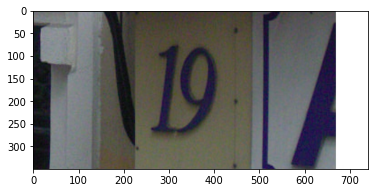

In [18]:
# plot an image

img = 'RawData/train/1.png'
image = mpimg.imread(img)
plt.imshow(image)
plt.show()

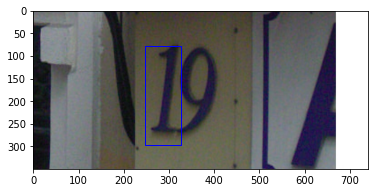

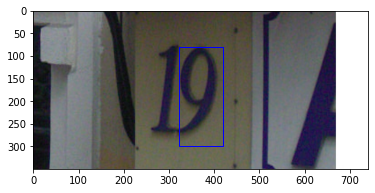

In [19]:
# use the get_image_boxes function to produce images with bounding boxes

box = get_image_boxes(train, idx=0)

for i in range(len(box['top'])):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.add_patch(Rectangle((box['left'][i], box['top'][i]),
                      box['width'][i], box['height'][i],
                      linewidth=1, edgecolor='b', facecolor='none'))
    plt.show()

In [21]:
# define paths for the data

path = os.getcwd()
train_path = os.path.join(path, 'RawData/train')
test_path = os.path.join(path, 'RawData/test')

{'height': [25, 25, 25], 'left': [42, 53, 58], 'top': [12, 12, 12], 'width': [11, 6, 13], 'label': [3, 1, 9]}


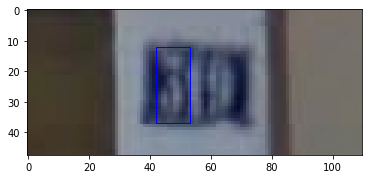

{'height': [13, 13], 'left': [10, 17], 'top': [1, 1], 'width': [6, 9], 'label': [1, 10]}


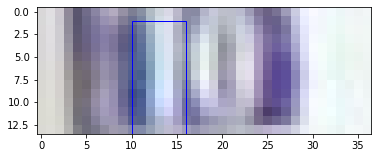

{'height': [37], 'left': [37], 'top': [4], 'width': [16], 'label': [1]}


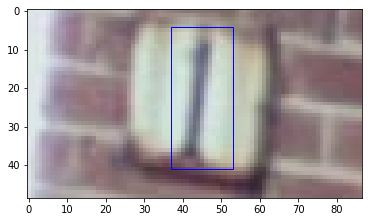

{'height': [74, 74], 'left': [34, 67], 'top': [20, 17], 'width': [29, 35], 'label': [1, 5]}


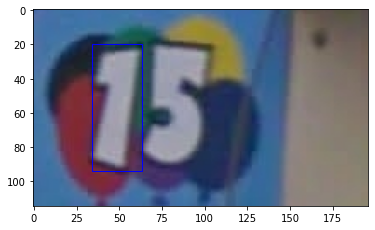

{'height': [28], 'left': [29], 'top': [5], 'width': [20], 'label': [5]}


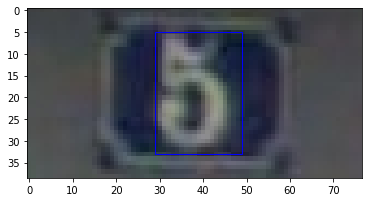

{'height': [94, 94, 94], 'left': [95, 139, 182], 'top': [26, 19, 14], 'width': [65, 49, 53], 'label': [4, 3, 10]}


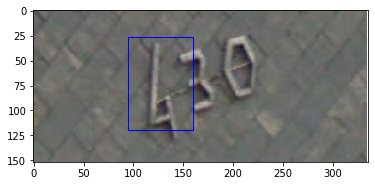

{'height': [42, 42], 'left': [50, 76], 'top': [17, 17], 'width': [28, 26], 'label': [2, 2]}


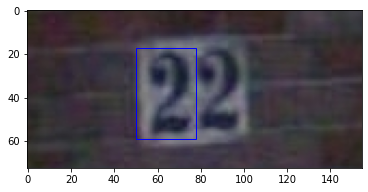

{'height': [41, 41, 41], 'left': [89, 106, 121], 'top': [26, 26, 24], 'width': [18, 17, 22], 'label': [2, 3, 5]}


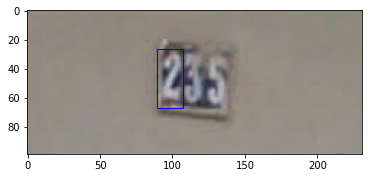

{'height': [52, 52], 'left': [58, 80], 'top': [11, 11], 'width': [25, 25], 'label': [3, 4]}


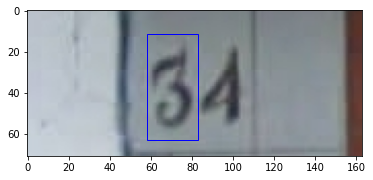

{'height': [25], 'left': [32], 'top': [1], 'width': [14], 'label': [9]}


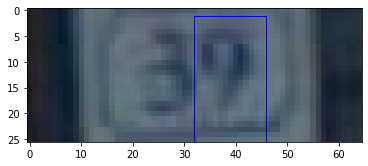

In [41]:
for _ in range(10):
    idx = random.randint(1, len(labels))
    fn = '{}{}'.format(idx, '.png')
    img_f = os.path.join(train_path, fn)
    img = mpimg.imread(img_f)
    fig, ax = plt.subplots(1)
    box = get_image_boxes(train, idx-1)
    print(box)
    
    for i in range(len(box['top'])):
        ax.imshow(img)
        ax.add_patch(Rectangle((box['left'][i], box['top'][i]),
                          box['width'][i], box['height'][i],
                          linewidth=1, edgecolor='b', facecolor='none'))
        plt.show()